# 📊 COVID-19 Data Analysis using NumPy, Pandas, and Matplotlib

Author: [Avinash](https://www.linkedin.com/in/avinashzz)  

---

## 🔎 Introduction
This notebook analyzes the global COVID-19 dataset using **NumPy, Pandas, and Matplotlib**.  
We will clean the dataset, transform it into long format, perform exploratory data analysis (EDA), and visualize trends.

---


In [2]:
# 📦 Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make plots clearer
plt.style.use("seaborn-v0_8")


## 📂 Load Dataset
We load the Johns Hopkins COVID-19 dataset for **confirmed cases**.

File: `time_series_covid19_confirmed_global.csv`  
Format:  
- Columns: Province/State, Country/Region, Lat, Long, then daily columns (1/22/20 …)


In [4]:
# Load dataset
df = pd.read_csv("time_series_covid19_confirmed_global.csv")
df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55445,55473,55492,55514,55518,55540,55557,55575,55580,55604
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,90835,91987,93075,93850,94651,95726,96838,97909,99062,100246
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,110303,110513,110711,110894,111069,111247,111418,111600,111764,111917
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10427,10463,10503,10538,10555,10583,10610,10645,10672,10699
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20294,20329,20366,20381,20389,20400,20452,20478,20499,20519


## 🧹 Data Transformation
The dataset is in **wide format** (dates as columns).  
We’ll reshape it into **long format** with:
- Country/Region  
- Date  
- Confirmed cases


In [6]:
# Melt wide → long format
df_long = df.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="Confirmed"
)

# Convert Date column
df_long["Date"] = pd.to_datetime(df_long["Date"])

# Group by Country + Date
df_long = df_long.groupby(["Country/Region", "Date"])["Confirmed"].sum().reset_index()

df_long.head()


C:\Users\avina\AppData\Local\Temp\ipykernel_18320\4146732635.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long["Date"] = pd.to_datetime(df_long["Date"])


,Country/Region,Date,Confirmed
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0


## 📊 Exploratory Data Analysis (EDA)
We’ll explore:  
- Total confirmed cases by country  
- Daily new cases  
- Global summary statistics


In [8]:
# Total confirmed cases by country
total_cases = df_long.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False)
print(total_cases.head(10))

# Daily new cases (India example)
india = df_long[df_long["Country/Region"] == "India"].set_index("Date")["Confirmed"]
india_new = india.diff().fillna(0)

# Stats using NumPy
print("Mean daily cases in India:", np.mean(india_new))
print("Std deviation:", np.std(india_new))


Country/Region
US                28134115
India             11005850
Brazil            10168174
United Kingdom     4127574
Russia             4117992
France             3597540
Spain              3133122
Italy              2809246
Turkey             2638422
Germany            2394515
Name: Confirmed, dtype: int64
Mean daily cases in India: 27722.544080604534
Std deviation: 28115.985036370992


## 📈 Visualizations
### 1. Line chart of daily new cases for selected countries


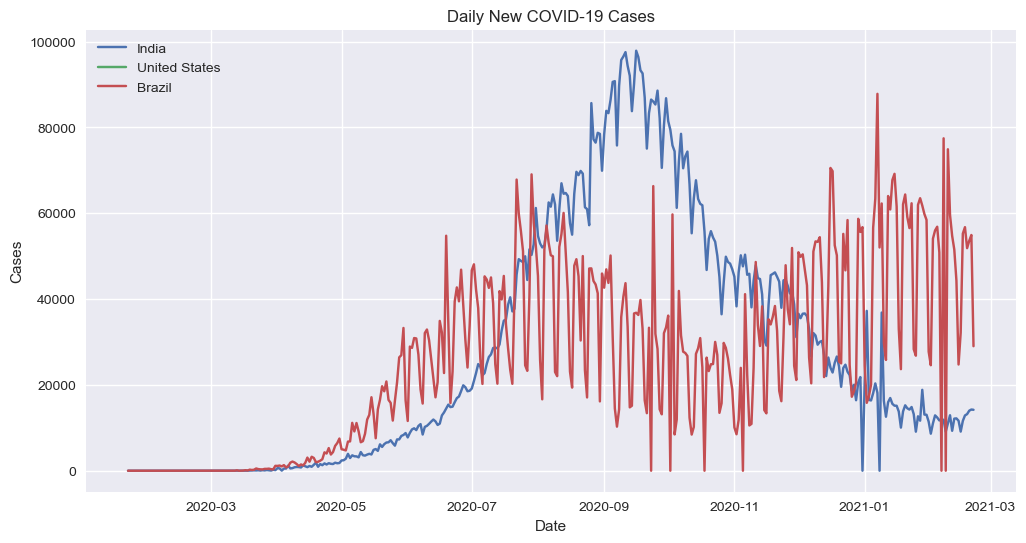

In [19]:
countries = ["India", "United States", "Brazil"]

plt.figure(figsize=(12,6))
for country in countries:
    data = df_long[df_long["Country/Region"] == country].set_index("Date")["Confirmed"]
    new_cases = data.diff().fillna(0)
    plt.plot(new_cases.index, new_cases.values, label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.savefig("daily_new_cases.png") 
plt.show()


### 2. Bar chart: Top 10 countries by total confirmed cases


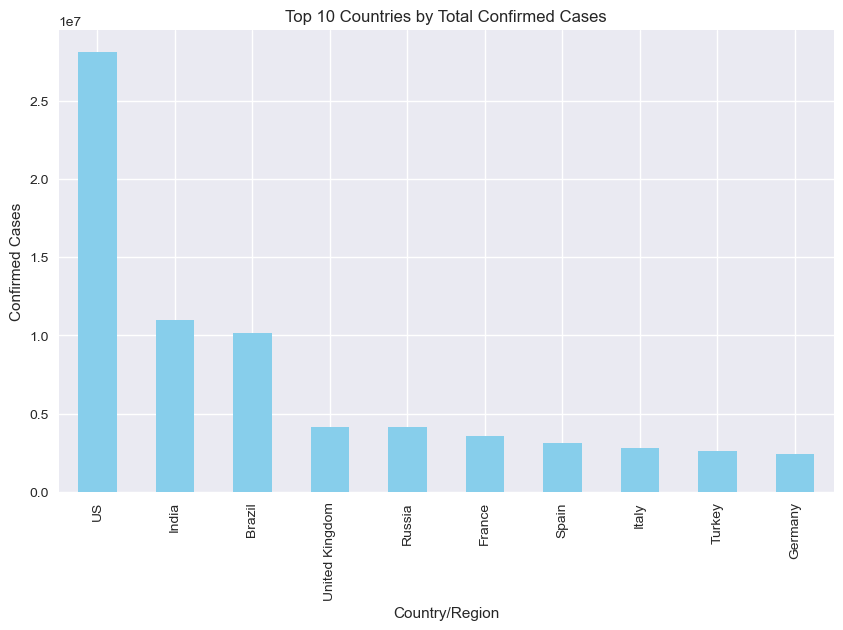

In [20]:
top10 = total_cases.head(10)

plt.figure(figsize=(10,6))
top10.plot(kind="bar", color="skyblue")
plt.title("Top 10 Countries by Total Confirmed Cases")
plt.ylabel("Confirmed Cases")
plt.savefig("top10_countries.png")  # save as PNG

plt.show()


### 3. Pie chart: Share of total cases among top 5 countries


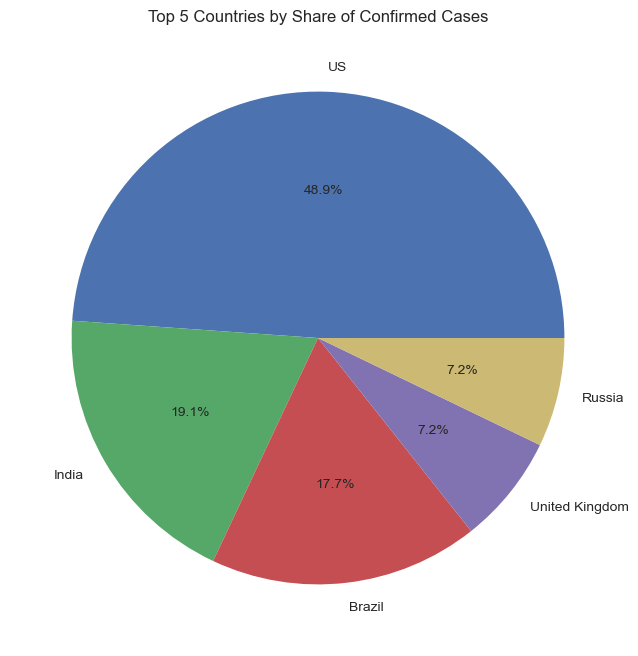

In [21]:
top5 = total_cases.head(5)

plt.figure(figsize=(8,8))
top5.plot(kind="pie", autopct='%1.1f%%')
plt.ylabel("")
plt.title("Top 5 Countries by Share of Confirmed Cases")
plt.savefig("top5_pie.png") 
plt.show()


### 4. Moving average (7-day rolling mean) for India


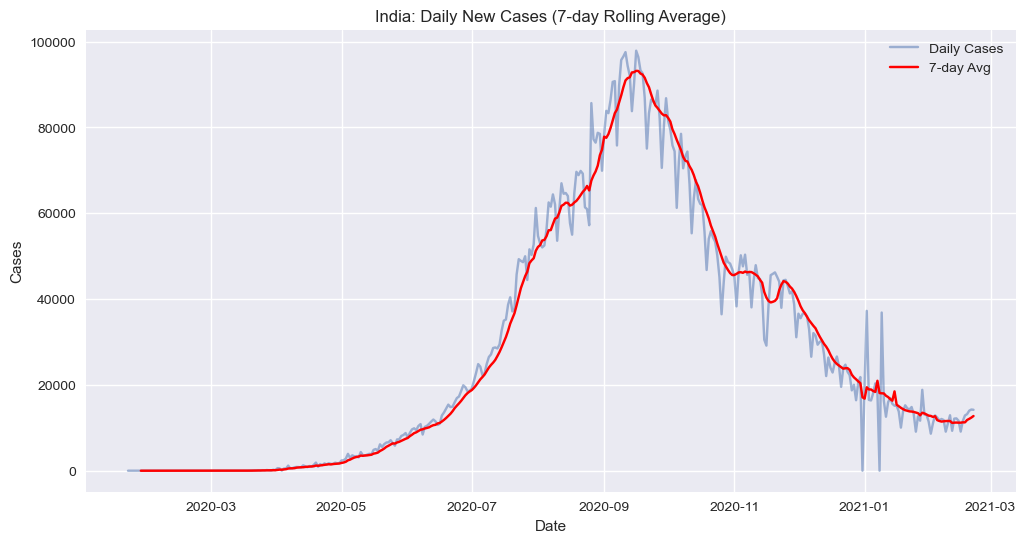

In [22]:
india_rolling = india_new.rolling(window=7).mean()

plt.figure(figsize=(12,6))
plt.plot(india_new.index, india_new.values, alpha=0.5, label="Daily Cases")
plt.plot(india_rolling.index, india_rolling.values, color="red", label="7-day Avg")
plt.title("India: Daily New Cases (7-day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.savefig("india_rolling_avg.png")  # save as PNG
plt.show()


## 📢 Insights
- Countries like USA, India, and Brazil have the highest total confirmed cases.  
- Daily new cases show clear **waves** of infection.  
- Rolling averages smooth fluctuations and reveal trends.  

---


## 👨‍💻 Author
**Avinash**  
🔗 [LinkedIn](https://www.linkedin.com/in/avinashzz)  
